In [1]:
import numpy as np
import matplotlib.pyplot  as  plt
from matplotlib.ticker import MaxNLocator
from scipy.special import binom

In [2]:
fparams =  {'xtick.labelsize': 20,
            'ytick.labelsize': 20,
            'axes.labelsize': 20,
            'axes.titlesize': 20,
            'font.size': 20,
            'legend.fontsize': 18,
            'text.usetex': True,
            'legend.frameon' : False,
            'svg.fonttype': 'path'}
plt.rcParams.update(fparams)

$p_k^{\beta} = \sum\limits_i \langle k i | \dfrac{1}{Z} e^{-\beta (H - \tilde{\mu} N)}  | k i \rangle $

$H = \omega \sum\limits_k  k \sum\limits_i  | k i \rangle  \langle k i |$

$N =  \sum\limits_k  k \sum\limits_i  | k i \rangle  \langle k i |$

In [3]:
# b = \beta (\omega - \tilde{\mu})
def pb(k, b, n):
    f = np.exp(-b * k) / (1. + np.exp(-b)) ** n * binom(n, k)
    return f

# infinite temperature
def pbinf(k, n):
    f = 1. / 2. ** n * binom(n, k)
    return f

In [4]:
#num = [4, 5, 6, 7, 8]
num = [4, 5, 6]
print(num)
print(len(num))
nr = 100 # -- number of realizations
mu = 2 # -- chemical potential in the fermion model
time = np.load('data/time.npy', allow_pickle = True)

p = {}
pav = {}
S = {}
SS2 = {}
Sav = {}
S2av = {}
VarS = {}

for n in range(len(num)):
    p[n] = np.load('data/p_N={}_nr={}_mu={}.npy'.format(num[n], nr, mu), allow_pickle = True)
    pav[n] = np.load('data/pav_N={}_nr={}_mu={}.npy'.format(num[n], nr, mu), allow_pickle = True)
    S[n] = np.load('data/S_N={}_nr={}_mu={}.npy'.format(num[n], nr, mu), allow_pickle = True)
    SS2[n] = np.load('data/SS2_N={}_nr={}_mu={}.npy'.format(num[n], nr, mu), allow_pickle = True)
    Sav[n] = np.load('data/Sav_N={}_nr={}_mu={}.npy'.format(num[n], nr, mu), allow_pickle = True)
    S2av[n] = np.load('data/S2av_N={}_nr={}_mu={}.npy'.format(num[n], nr, mu), allow_pickle = True)
    VarS[n] = np.load('data/VarS_N={}_nr={}_mu={}.npy'.format(num[n], nr, mu), allow_pickle = True)

[4, 5, 6]
3


In [5]:
beta = {}

for n in range(len(num)):
    beta[n] = np.arcsinh( - Sav[n] / VarS[n]) 

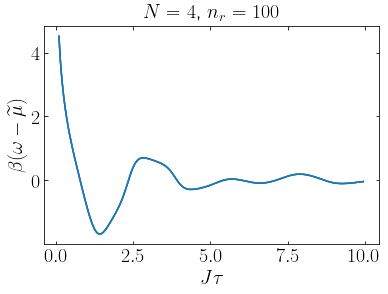

In [6]:
num_ind = 0
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'$\beta (\omega - \widetilde{\mu})$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$'.format(nr))
for n in range(len(num)):
    ax.plot(time[2:200], beta[num_ind][2:200],  '-', color = 'tab:blue')
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/b_N={}_nr={}.svg'.format(num[num_ind], nr))

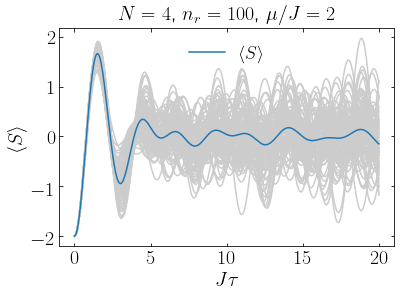

In [7]:
num_ind = 0
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'$\langle S \rangle$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\mu/J = $'+' ${}$'.format(mu))
for j in range(nr):
    ax.plot(time, np.transpose(S[num_ind])[j], color='0.8')
ax.plot(time, Sav[num_ind],  '-', label = r'$\langle S \rangle$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/S_N={}_nr={}_mu={}.svg'.format(num[num_ind], nr, mu))

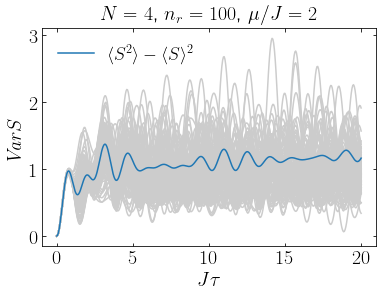

In [8]:
num_ind = 0
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'${\it Var}  S$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\mu/J = $'+' ${}$'.format(mu))
for j in range(nr):
    ax.plot(time, np.transpose(SS2[num_ind])[j], color='0.8')
ax.plot(time, VarS[num_ind],  '-', label = r'$\langle S^2 \rangle - \langle S \rangle^2$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/VarS_N={}_nr={}_mu={}.svg'.format(num[num_ind], nr, mu))

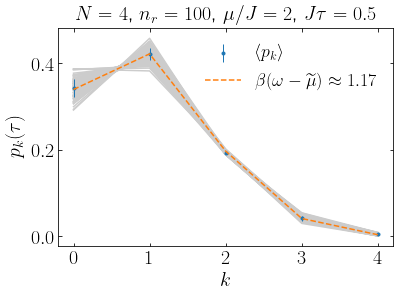

In [9]:
num_ind = 0
t_ind = 10
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\mu/J = $'+' ${}$, '.format(mu)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr, elinewidth=1, label = r'$\langle p_k \rangle$') 
ax.plot(keys, pb(keys, beta[num_ind][t_ind], num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 1, label = r'$\beta (\omega -\widetilde{\mu}) \approx $'+' ${}$'.format(round(beta[num_ind][t_ind],2)))
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#plt.savefig('figs/pk_N={}_nr={}_mu={}_tau={}.svg'.format(num[num_ind], nr, mu, time[t_ind]))

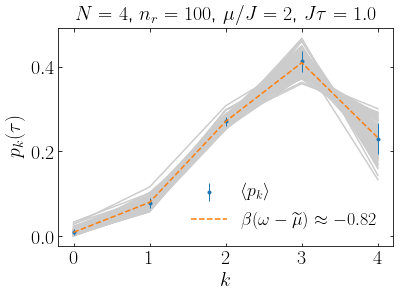

In [10]:
num_ind = 0
t_ind = 20
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\mu/J = $'+' ${}$, '.format(mu)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr, elinewidth=1, label = r'$\langle p_k \rangle$') 
ax.plot(keys, pb(keys, beta[num_ind][t_ind], num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 1, label = r'$\beta (\omega -\widetilde{\mu}) \approx $'+' ${}$'.format(round(beta[num_ind][t_ind],2)))
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#plt.savefig('figs/pk_N={}_nr={}_mu={}_tau={}.svg'.format(num[num_ind], nr, mu, time[t_ind]))

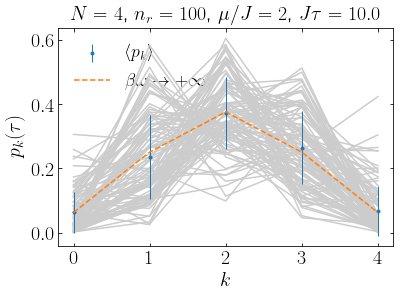

In [11]:
num_ind = 0
t_ind = 200
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\mu/J = $'+' ${}$, '.format(mu)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr, elinewidth=1, label = r'$\langle p_k \rangle$') 
ax.plot(keys, pbinf(keys, num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 1, label = r'$\beta \omega \to +\infty$')
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#ax.legend()
#plt.savefig('figs/pk_N={}_nr={}_mu={}_tau={}.svg'.format(num[num_ind], nr, mu, time[t_ind]))

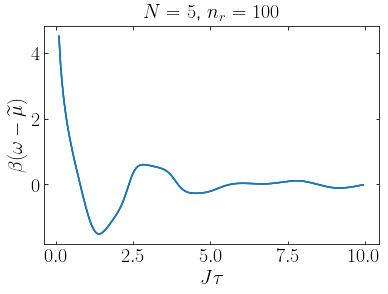

In [12]:
num_ind = 1
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'$\beta (\omega - \widetilde{\mu})$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$'.format(nr))
for n in range(len(num)):
    ax.plot(time[2:200], beta[num_ind][2:200],  '-', color = 'tab:blue')
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/b_N={}_nr={}.svg'.format(num[num_ind], nr))

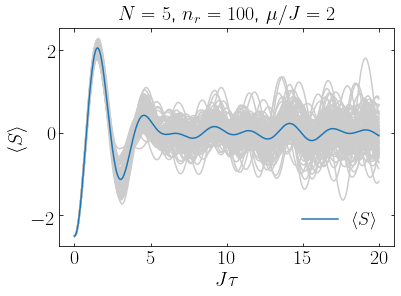

In [13]:
num_ind = 1
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'$\langle S \rangle$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\mu/J = $'+' ${}$'.format(mu))
for j in range(nr):
    ax.plot(time, np.transpose(S[num_ind])[j], color='0.8')
ax.plot(time, Sav[num_ind],  '-', label = r'$\langle S \rangle$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/S_N={}_nr={}_mu={}.svg'.format(num[num_ind], nr, mu))

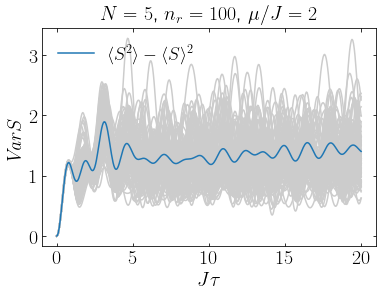

In [14]:
num_ind = 1
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'${\it Var}  S$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\mu/J = $'+' ${}$'.format(mu))
for j in range(nr):
    ax.plot(time, np.transpose(SS2[num_ind])[j], color='0.8')
ax.plot(time, VarS[num_ind],  '-', label = r'$\langle S^2 \rangle - \langle S \rangle^2$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
plt.savefig('figs/VarS_N={}_nr={}_mu={}.svg'.format(num[num_ind], nr, mu))

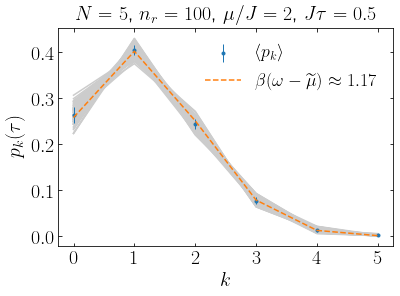

In [15]:
num_ind = 1
t_ind = 10
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\mu/J = $'+' ${}$, '.format(mu)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr, elinewidth=1, label = r'$\langle p_k \rangle$') 
ax.plot(keys, pb(keys, beta[num_ind][t_ind], num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 1, label = r'$\beta (\omega -\widetilde{\mu}) \approx $'+' ${}$'.format(round(beta[num_ind][t_ind],2)))
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#plt.savefig('figs/pk_N={}_nr={}_mu={}_tau={}.svg'.format(num[num_ind], nr, mu, time[t_ind]))

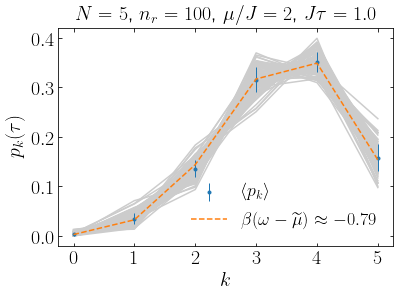

In [16]:
num_ind = 1
t_ind = 20
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\mu/J = $'+' ${}$, '.format(mu)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr, elinewidth=1, label = r'$\langle p_k \rangle$') 
ax.plot(keys, pb(keys, beta[num_ind][t_ind], num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 1, label = r'$\beta (\omega -\widetilde{\mu}) \approx $'+' ${}$'.format(round(beta[num_ind][t_ind],2)))
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#plt.savefig('figs/pk_N={}_nr={}_mu={}_tau={}.svg'.format(num[num_ind], nr, mu, time[t_ind]))

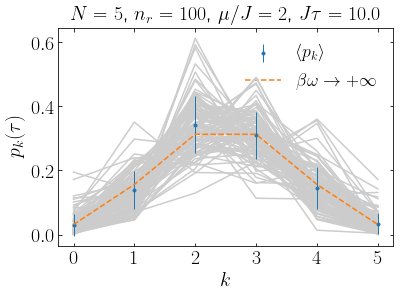

In [17]:
num_ind = 1
t_ind = 200
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\mu/J = $'+' ${}$, '.format(mu)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr, elinewidth=1, label = r'$\langle p_k \rangle$') 
ax.plot(keys, pbinf(keys, num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 1, label = r'$\beta \omega \to +\infty$')
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#ax.legend()
#plt.savefig('figs/pk_N={}_nr={}_mu={}_tau={}.svg'.format(num[num_ind], nr, mu, time[t_ind]))

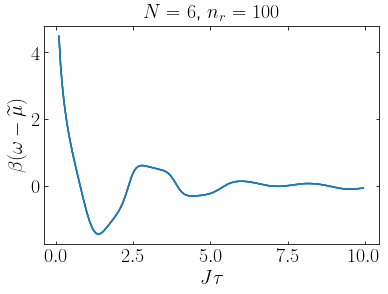

In [18]:
num_ind = 2
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'$\beta (\omega - \widetilde{\mu})$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$'.format(nr))
for n in range(len(num)):
    ax.plot(time[2:200], beta[num_ind][2:200],  '-', color = 'tab:blue')
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/b_N={}_nr={}.svg'.format(num[num_ind], nr))

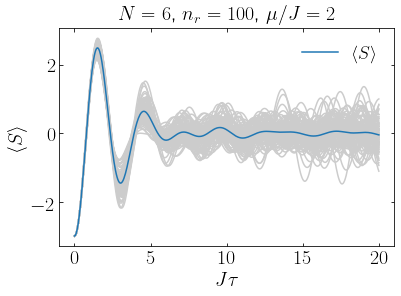

In [19]:
num_ind = 2
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'$\langle S \rangle$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\mu/J = $'+' ${}$'.format(mu))
for j in range(nr):
    ax.plot(time, np.transpose(S[num_ind])[j], color='0.8')
ax.plot(time, Sav[num_ind],  '-', label = r'$\langle S \rangle$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/S_N={}_nr={}_mu={}.svg'.format(num[num_ind], nr, mu))

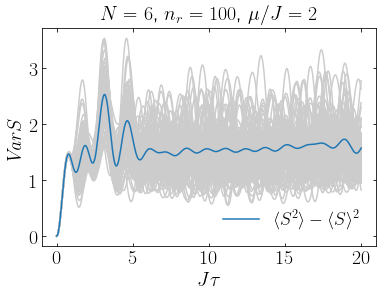

In [20]:
num_ind = 2
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'${\it Var}  S$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\mu/J = $'+' ${}$'.format(mu))
for j in range(nr):
    ax.plot(time, np.transpose(SS2[num_ind])[j], color='0.8')
ax.plot(time, VarS[num_ind],  '-', label = r'$\langle S^2 \rangle - \langle S \rangle^2$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/VarS_N={}_nr={}_mu={}.svg'.format(num[num_ind], nr, mu))

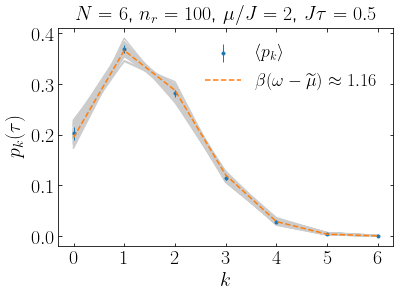

In [21]:
num_ind = 2
t_ind = 10
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\mu/J = $'+' ${}$, '.format(mu)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr, elinewidth=1, label = r'$\langle p_k \rangle$') 
ax.plot(keys, pb(keys, beta[num_ind][t_ind], num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 1, label = r'$\beta (\omega -\widetilde{\mu}) \approx $'+' ${}$'.format(round(beta[num_ind][t_ind],2)))
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#plt.savefig('figs/pk_N={}_nr={}_mu={}_tau={}.svg'.format(num[num_ind], nr, mu, time[t_ind]))

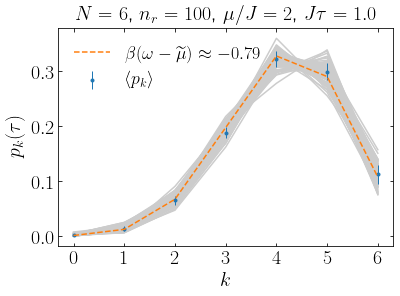

In [22]:
num_ind = 2
t_ind = 20
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\mu/J = $'+' ${}$, '.format(mu)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr, elinewidth=1, label = r'$\langle p_k \rangle$') 
ax.plot(keys, pb(keys, beta[num_ind][t_ind], num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 1, label = r'$\beta (\omega -\widetilde{\mu}) \approx $'+' ${}$'.format(round(beta[num_ind][t_ind],2)))
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
ax.legend()
#plt.savefig('figs/pk_N={}_nr={}_mu={}_tau={}.svg'.format(num[num_ind], nr, mu, time[t_ind]))

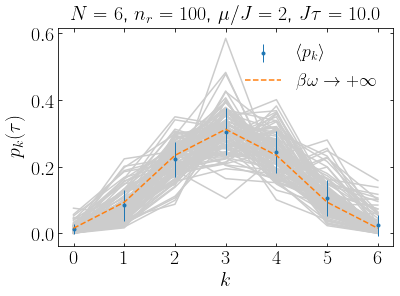

In [23]:
num_ind = 2
t_ind = 200
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$\mu/J = $'+' ${}$, '.format(mu)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr, elinewidth=1, label = r'$\langle p_k \rangle$') 
ax.plot(keys, pbinf(keys, num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 1, label = r'$\beta \omega \to +\infty$')
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#plt.savefig('figs/pk_N={}_nr={}_mu={}_tau={}.svg'.format(num[num_ind], nr, mu, time[t_ind]))